# Make prediction with predict_proba()      
* the scikitlearn estimator plan can be found here
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [2]:

import pandas as pd
import numpy as np




In [3]:
# Make prediction with predict_proba()

car_sales=pd.read_csv("car-sales-extended.csv")
heart_disease=pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


model=RandomForestClassifier(n_estimators=10)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8524590163934426

In [5]:
y_pred=model.predict(x_test)

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8524590163934426

In [7]:
# Prediction
model.predict(x_test[:5])

array([0, 0, 1, 0, 1], dtype=int64)

In [8]:
# use predict probability function
model.predict_proba(x_test[:5])

array([[0.9, 0.1],
       [0.5, 0.5],
       [0.4, 0.6],
       [0.9, 0.1],
       [0.1, 0.9]])

"predict" can also be used for regression models

In [9]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [10]:
housing_df=pd.DataFrame(housing["data"])
housing_df.columns=housing['feature_names']
housing_df["target"]=housing["target"]

In [11]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [12]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
#Create the data
x=housing_df.drop("target",axis=1)
y=housing_df["target"]
# Split into training and test
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
# create models
model=RandomForestRegressor()
# train model
model.fit(x_train,y_train)
y_pred=model.predict(x_test)




In [13]:
y_pred[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [14]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [15]:
# Average of difference between prediction and test values 
# campare the prediction from the truth

from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,y_pred)

0.32659871732073664

# Evaluating a machine learning model
three ways to evaluate scikit-learn models/estimator
1. Estimator built-in score()method
2. the scoring parameter
3. problem-specific metric function

you can read more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html
     

## 4.1 evaluating with score method

In [16]:
np.random.seed(42)

x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model=RandomForestClassifier()
model.fit(x_train,y_train)


RandomForestClassifier()

In [17]:
model.score(x_train,y_train)
model.score(x_test,y_test)

0.8524590163934426

# 4.2 evaluation  using scoring parameter (*******cross_val_score*******)

In [24]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


model=RandomForestClassifier(n_estimators=10)
model.fit(x_train,y_train)
model.score(x_test,y_test)



0.8524590163934426

In [25]:
model.score(x_test,y_test)


0.8524590163934426

In [30]:

from sklearn.model_selection import cross_val_score
cross_val_score(model,x,y, cv=10)


array([0.83870968, 0.83870968, 0.87096774, 0.9       , 0.83333333,
       0.73333333, 0.73333333, 0.83333333, 0.63333333, 0.8       ])

(0.8524590163934426, 0.7982795698924731)

# What cross_val_score is:
* for example it devide the datas to test and train with 0.8 to 0.2 five times and give us the score for all of them...it is important that all values of the array be in same range

In [35]:
model.score(x_test,y_test), np.mean(cross_val_score(model,x,y, cv=10))

(0.8524590163934426, 0.8084946236559141)

#4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#np.random.seed(42)

x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
cross_val_score(model,x,y, cv=5)

array([0.83606557, 0.91803279, 0.81967213, 0.85      , 0.8       ])

# Area under the recieve operating characteristic curve AUC/ROC
* Area under curve
* ROC curve 
ROC curves are a camparison of a model's true positive rate (tpr) versuss a model fulse positive rate(fpr)

* true positive=model predict 1 when truth is 1
* false positive=model predict 1 when truth is 0
* true negetive= model predict 0 when truth is 0
* false negetive= model predict 1 when truth is   1

In [43]:
from sklearn.metrics import roc_curve
# make prediction with probabilities
y_probs=model.predict_proba(x_test)
y_probs[:10]

array([[0.96, 0.04],
       [0.46, 0.54],
       [0.45, 0.55],
       [0.86, 0.14],
       [0.24, 0.76],
       [0.18, 0.82],
       [0.32, 0.68],
       [0.98, 0.02],
       [0.97, 0.03],
       [0.46, 0.54]])

In [45]:
y_probs_positive=y_probs[:,1]
y_probs_positive[:10]

array([0.04, 0.54, 0.55, 0.14, 0.76, 0.82, 0.68, 0.02, 0.03, 0.54])

In [54]:
# calculate fpr, tpr and thresholds
import matplotlib.pyplot as plt
fpr,tpr,threshold=roc_curve(y_test,y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.03448276, 0.06896552, 0.06896552,
       0.06896552, 0.06896552, 0.13793103, 0.13793103, 0.13793103,
       0.17241379, 0.17241379, 0.20689655, 0.20689655, 0.27586207,
       0.31034483, 0.37931034, 0.5862069 , 0.65517241, 0.72413793,
       0.72413793, 0.75862069, 0.89655172, 1.        ])

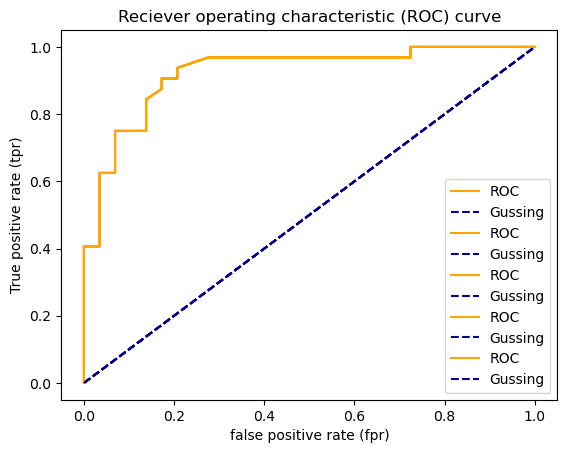

In [61]:
# Create a function for ploting ROC curve
import matplotlib.pyplot as plt
%matplotlib inline

def plot_roc_curve (fpr,tpr):
    #"Plot ROC curve given the false positive rate (fpr) and true positive rate (tpr)of model"
    #plot roc curve
    plt.plot(fpr,tpr,color="orange",label="ROC")
    # plot line with no prediction power (basic line)
    plt.plot ([0,1],[0,1],color="darkblue",linestyle="--", label="Gussing")

    # customize the plot
    plt.xlabel("false positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Reciever operating characteristic (ROC) curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)


In [62]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)

0.9240301724137931

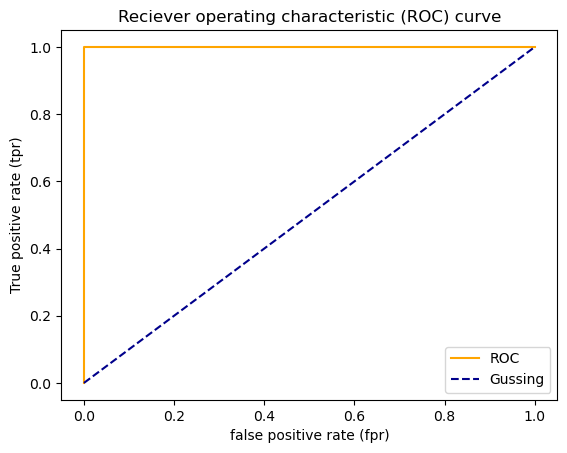

In [63]:
#plot perfec ROC curve and AUC score
fpr,tpr,threshold=roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [64]:
#Perfect AUC score
roc_auc_score(y_test,y_test)

1.0

# ** Confusion Matrix**